In [11]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.3/1.3 MB 832.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score  
import lightgbm as lgb  

In [13]:
data=pd.read_csv("C:/Users/armaa/OneDrive/Documents/GitHub/Flip_robo_internship/IPL Matches/IPL Matches 2008-2020.csv")
data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [14]:
#Analysis of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [15]:
data['team2'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Deccan Chargers',
       'Kings XI Punjab', 'Delhi Daredevils', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [16]:
data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [17]:
# Replacing 'Rising Pune Supergiants' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Rising Pune Supergiants': 'Rising Pune Supergiant'}, regex=True, inplace=True)

In [18]:
data.team1.replace({'Deccan Chargers':'Sunrisers Hyderabad'},regex=True,inplace=True)
data.team2.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)
data.toss_winner.replace({'Deccan Chargers': 'Sunrisers Hyderabad'}, regex=True, inplace=True)

In [19]:
# Replacing 'Delhi Daredevils' with 'Delhi Capitals' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.team2.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)
data.toss_winner.replace({'Delhi Daredevils': 'Delhi Capitals'}, regex=True, inplace=True)

# Replacing 'Pune Warriors' with 'Rising Pune Supergiant' in the 'team1', 'team2', 'winner', and 'toss_winner' columns.
data.team1.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.team2.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)
data.toss_winner.replace({'Pune Warriors': 'Rising Pune Supergiant'}, regex=True, inplace=True)

In [20]:
data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [21]:
data['city'].fillna('Unknown',inplace=True)

In [22]:
cols_to_fill = ['player_of_match', 'result', 'eliminator']
data[cols_to_fill] = data[cols_to_fill].fillna('Not Available')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             816 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  816 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           816 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       816 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [23]:
mean_result_margin = data['result_margin'].mean()
# Fill missing values in 'result_margin' column with the mean
data['result_margin'].fillna(mean_result_margin, inplace=True)

In [24]:
data.drop(['id','method'],axis=1,inplace=True)

In [25]:
data

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.000000,N,Asad Rauf,RE Koertzen
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.000000,N,MR Benson,SL Shastri
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.000000,N,Aleem Dar,GA Pratapkumar
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.000000,N,SJ Davis,DJ Harper
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.000000,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,17.321652,Y,Nitin Menon,PR Reiffel
812,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.000000,N,CB Gaffaney,Nitin Menon
813,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.000000,N,PR Reiffel,S Ravi
814,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.000000,N,PR Reiffel,S Ravi


In [26]:
data.dropna(subset=['winner'],inplace=True)

In [27]:
data['date']=pd.to_datetime(data['date'])

In [28]:
data.head(3)

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,Aleem Dar,GA Pratapkumar


In [29]:
data['season'] = pd.DatetimeIndex(data['date']).year

In [30]:
data

,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2,season
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.000000,N,Asad Rauf,RE Koertzen,2008
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.000000,N,MR Benson,SL Shastri,2008
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.000000,N,Aleem Dar,GA Pratapkumar,2008
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.000000,N,SJ Davis,DJ Harper,2008
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.000000,N,BF Bowden,K Hariharan,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,17.321652,Y,Nitin Menon,PR Reiffel,2020
812,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.000000,N,CB Gaffaney,Nitin Menon,2020
813,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.000000,N,PR Reiffel,S Ravi,2020
814,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.000000,N,PR Reiffel,S Ravi,2020


In [31]:
data['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'M Chinnaswamy Stadium'),
  Text(1, 0, 'Punjab Cricket Association Stadium, Mohali'),
  Text(2, 0, 'Feroz Shah Kotla'),
  Text(3, 0, 'Wankhede Stadium'),
  Text(4, 0, 'Eden Gardens'),
  Text(5, 0, 'Sawai Mansingh Stadium'),
  Text(6, 0, 'Rajiv Gandhi International Stadium, Uppal'),
  Text(7, 0, 'MA Chidambaram Stadium, Chepauk'),
  Text(8, 0, 'Dr DY Patil Sports Academy'),
  Text(9, 0, 'Newlands'),
  Text(10, 0, "St George's Park"),
  Text(11, 0, 'Kingsmead'),
  Text(12, 0, 'SuperSport Park'),
  Text(13, 0, 'Buffalo Park'),
  Text(14, 0, 'New Wanderers Stadium'),
  Text(15, 0, 'De Beers Diamond Oval'),
  Text(16, 0, 'OUTsurance Oval'),
  Text(17, 0, 'Brabourne Stadium'),
  Text(18, 0, 'Sardar Patel Stadium, Motera'),
  Text(19, 0, 'Barabati Stadium'),
  Text(20, 0, 'Vidarbha Cricket Association Stadium, Ja

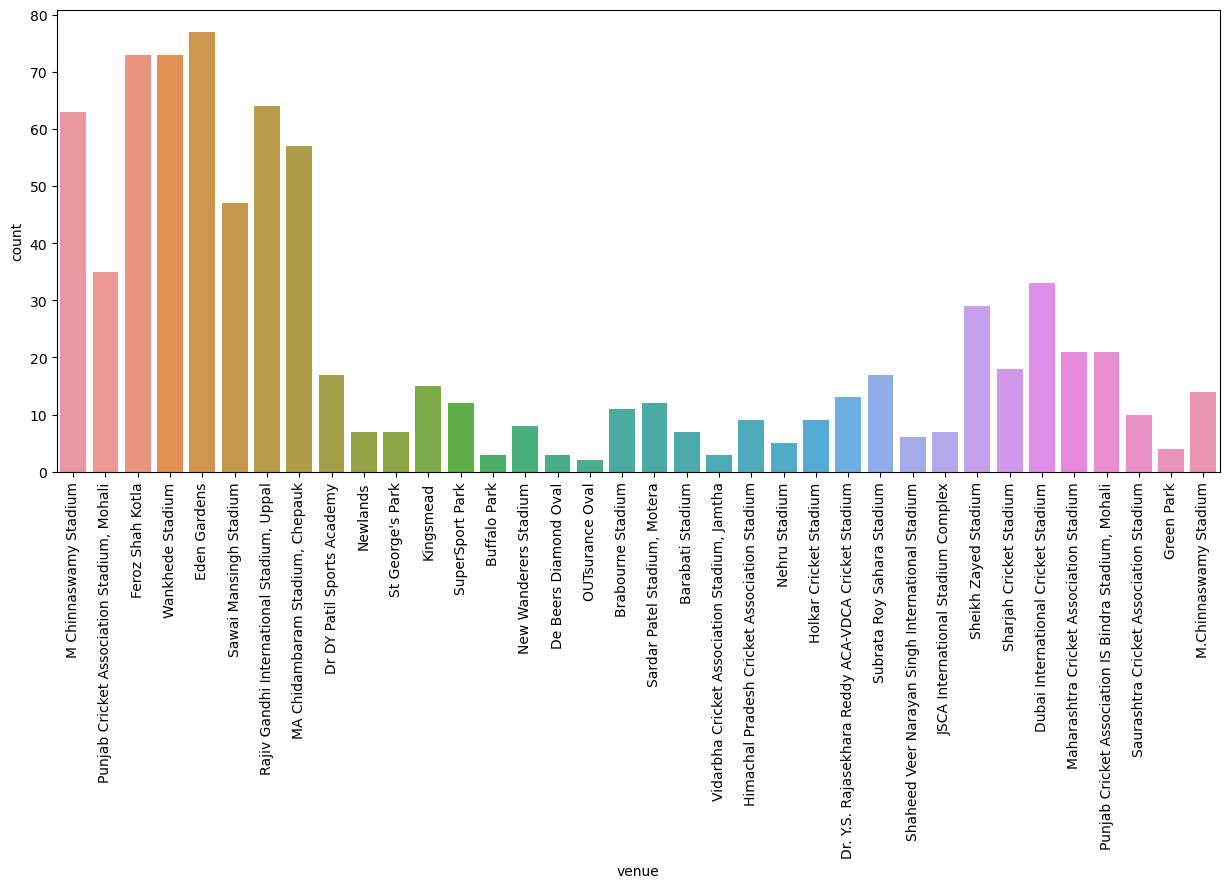

In [32]:
plt.figure(figsize=(15,6))
sns.countplot(data=data,x='venue')
plt.xticks(rotation=90)

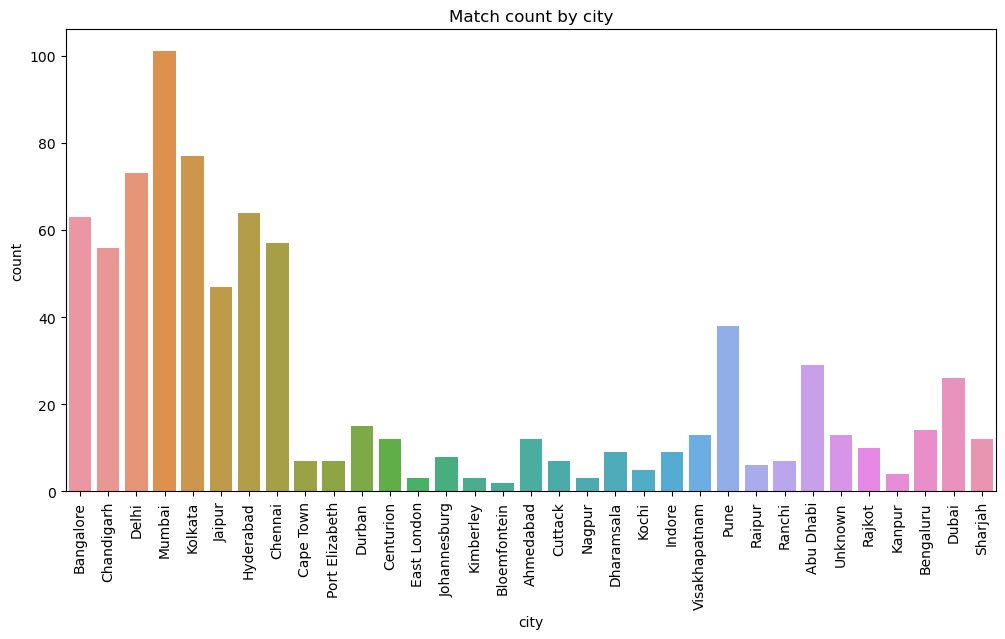

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(data=data,x='city')
plt.xticks(rotation=90)
plt.xlabel('city')
plt.ylabel('count')
plt.title('Match count by city')
plt.show()

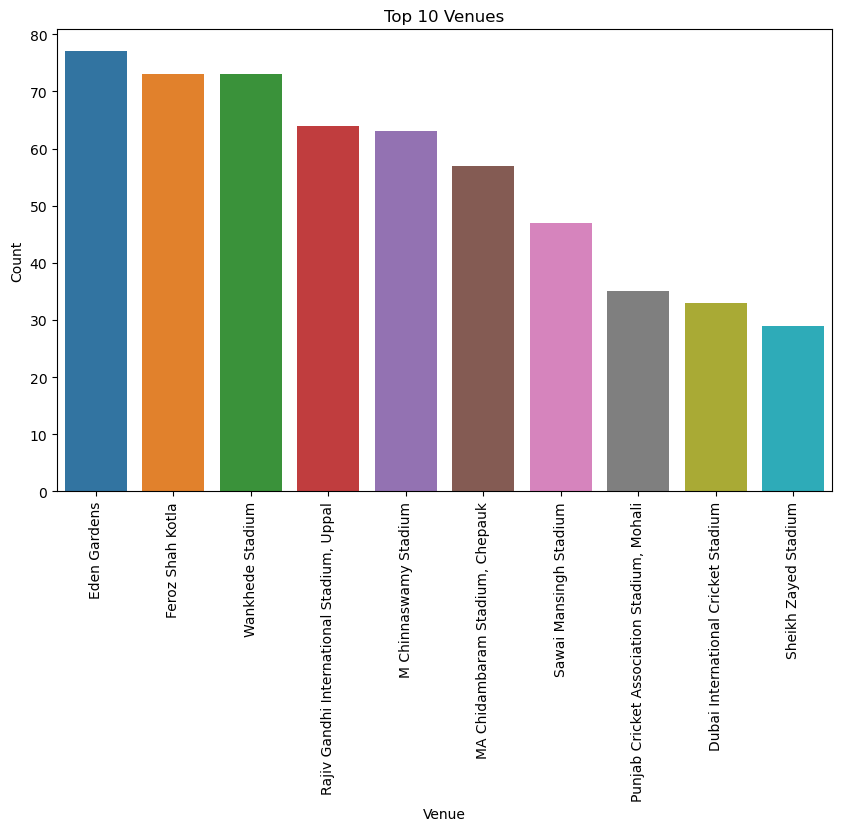

In [34]:
venue_counts = data['venue'].value_counts().head(10)

# Create a figure of size 10x6 inches for the plot
plt.figure(figsize=(10, 6))

# Use Seaborn's barplot to plot the count of matches for each of the top 10 venues
# The 'x' parameter is set to the venue names (index of venue_counts), and 'y' is set to the corresponding match counts (values of venue_counts)
sns.barplot(x=venue_counts.index, y=venue_counts.values)

# Add labels for x and y axes
plt.xlabel('Venue')
plt.ylabel('Count')

# Add a title to the plot
plt.title('Top 10 Venues')

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

Text(0, 0.5, 'Count')

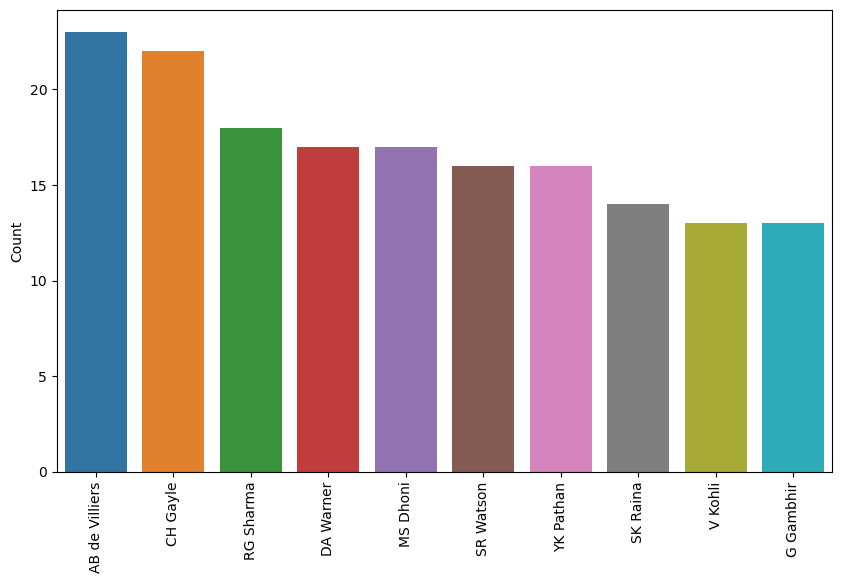

In [35]:
plt.figure(figsize=(10,6))
top_players=data['player_of_match'].value_counts().head(10)
sns.barplot(x=top_players.index ,y=top_players.values)
plt.xticks(rotation=90)
plt.ylabel('Count')

In [36]:
# Extracting day, month, and year from the 'date' column
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

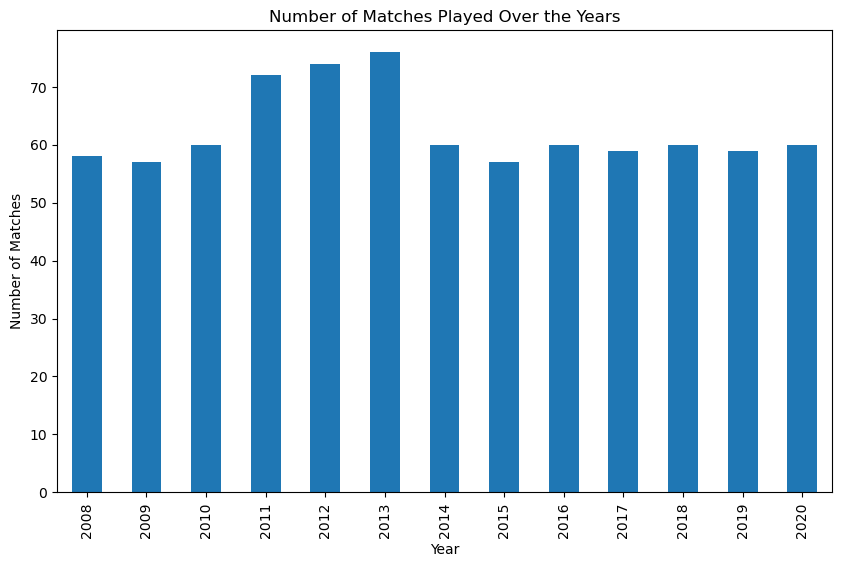

In [37]:
plt.figure(figsize=(10,6))
data['year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played Over the Years')
plt.show()

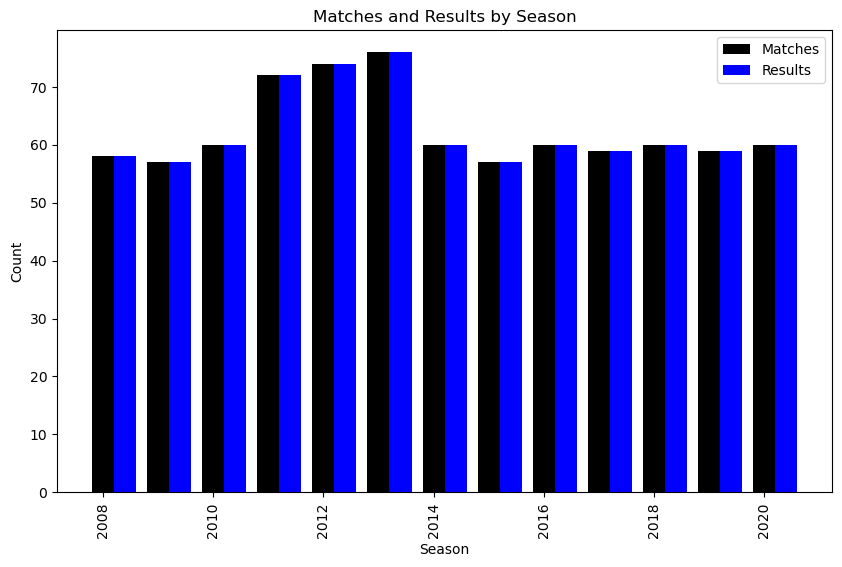

In [38]:
# Matches and Results by Season
season_matches = data['season'].value_counts()
season_results = data['winner'].groupby(data['season']).value_counts().unstack(fill_value=0)

# Plotting Matches and Results by Season
plt.figure(figsize=(10, 6))
bar_width = 0.4

plt.bar(season_matches.index, season_matches.values, width=bar_width, color='black', label='Matches')
plt.bar(season_results.index + bar_width, season_results.values.sum(axis=1), width=bar_width, color='blue', label='Results')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Matches and Results by Season')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [39]:
team_wins=data['winner'].value_counts()
team_matches=data['team1'].value_counts()+data['team2'].value_counts()
win_percentage=(team_wins/team_matches).sort_values(ascending=False)

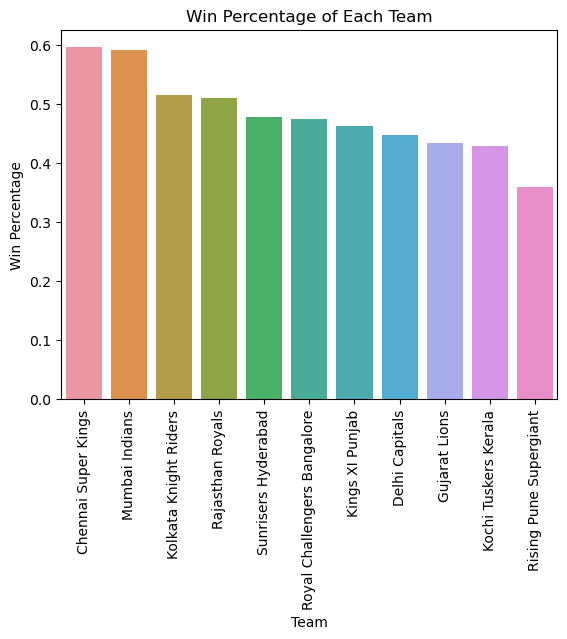

In [40]:
sns.barplot(x=win_percentage.index,y=win_percentage.values)
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Each Team')
plt.show()

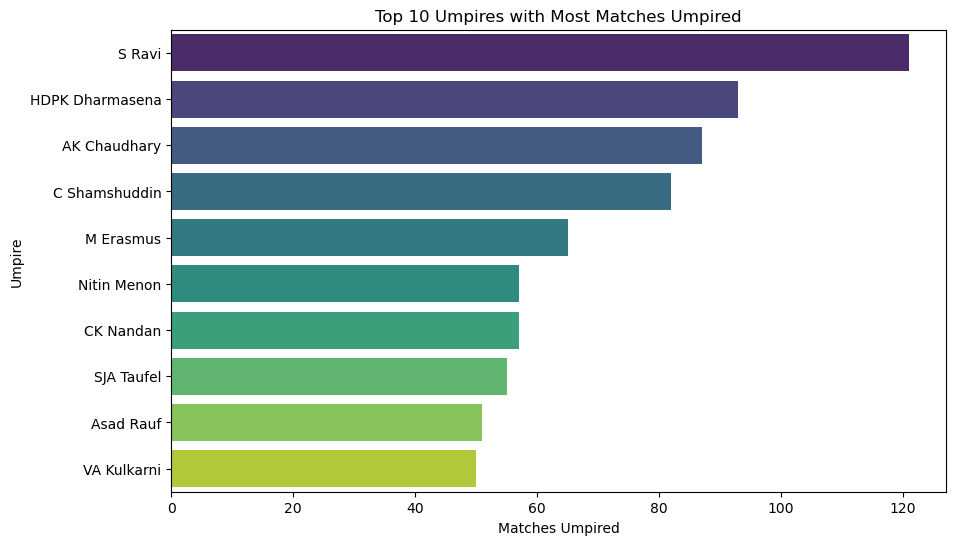

In [41]:
# Umpire-wise Analysis
umpire1_counts = data['umpire1'].value_counts().reset_index()
umpire1_counts.columns = ['umpire', 'matches_umpired']

umpire2_counts = data['umpire2'].value_counts().reset_index()
umpire2_counts.columns = ['umpire', 'matches_umpired']

# Combine counts from umpire1 and umpire2
umpire_counts = umpire1_counts.merge(umpire2_counts, on='umpire', how='outer')
umpire_counts['matches_umpired'] = umpire_counts['matches_umpired_x'].fillna(0) + umpire_counts['matches_umpired_y'].fillna(0)
umpire_counts = umpire_counts[['umpire', 'matches_umpired']]
umpire_counts = umpire_counts.sort_values(by='matches_umpired', ascending=False).head(10)

# Plotting Umpire-wise Analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='matches_umpired', y='umpire', data=umpire_counts, palette='viridis')
plt.xlabel('Matches Umpired')
plt.ylabel('Umpire')
plt.title('Top 10 Umpires with Most Matches Umpired')
plt.show()

In [42]:
#create a map to declare team name with unique no
data['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Sunrisers Hyderabad', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Rising Pune Supergiant', 'Gujarat Lions'],
      dtype=object)

In [43]:
team_mapping={'Kolkata Knight Riders':1,
               'Chennai Super Kings':2,
               'Delhi Capitals':3,
               'Royal Challengers Bangalore': 4,
    'Rajasthan Royals': 5,
    'Kings XI Punjab': 6,
    'Sunrisers Hyderabad': 7,
    'Mumbai Indians': 8,
    'Rising Pune Supergiant': 9,
    'Kochi Tuskers Kerala': 10,
    'Gujarat Lions': 11
              }

In [44]:
data['team1']=data['team1'].map(team_mapping)
data['team2']=data['team2'].map(team_mapping)
# Replace winner names in 'winner' column with unique numbers
data['winner'] = data['winner'].map(team_mapping)
data['toss_winner'] = data['toss_winner'].map(team_mapping)

In [45]:
venue_mapping={venue:i for i,venue in enumerate(data['venue'].unique())}
data['venue']=data['venue'].map(venue_mapping)

In [46]:
data['toss_decision'].unique()

array(['field', 'bat'], dtype=object)

In [47]:
temp={'field':0,'bat':1}
data['toss_decision']=data['toss_decision'].map(temp)

In [48]:
umpires_set = set(data['umpire1'].unique()).union(set(data['umpire2'].unique()))

umpire_dict = {umpire: i for i, umpire in enumerate(umpires_set, 1)}

# Apply the dictionary to create new encoded columns for 'umpire1' and 'umpire2'
data['umpire1'] = data['umpire1'].map(umpire_dict)
data['umpire2'] = data['umpire2'].map(umpire_dict)

In [49]:
# Create a dictionary to map each unique venue name to a unique number
player_of_match_mapping = {venue: i for i, venue in enumerate(data['player_of_match'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['player_of_match'] = data['player_of_match'].map(player_of_match_mapping)

In [50]:
# Create a dictionary to map each unique venue name to a unique number
city_mapping = {venue: i for i, venue in enumerate(data['city'].unique())}

# Replace the venue names in the 'venue' column with the corresponding unique numbers
data['city'] = data['city'].map(city_mapping)

In [51]:
unwanted_cols=['date','result','eliminator','season','day','month','year']
data.drop(columns=unwanted_cols ,inplace=True)

In [52]:
data

,city,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result_margin,umpire1,umpire2
0,0,0,0,0,4,1,4,0,1,140.000000,4,3
1,1,1,1,0,6,2,2,1,2,33.000000,15,12
2,2,2,2,0,3,5,5,1,3,9.000000,5,28
3,3,3,3,0,8,4,8,1,4,5.000000,51,18
4,4,4,4,0,1,7,7,1,1,5.000000,29,37
...,...,...,...,...,...,...,...,...,...,...,...,...
811,31,46,30,0,4,8,8,0,4,17.321652,7,41
812,31,189,30,0,8,3,3,0,8,57.000000,54,7
813,26,192,28,0,4,7,7,0,7,6.000000,41,21
814,26,182,28,0,3,7,3,1,3,17.000000,41,21


In [53]:
X=data.drop(['winner'],axis=1)
y=data['winner']

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier 
forest=RandomForestClassifier(n_estimators=500,random_state=1)

In [56]:
forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=1)

In [57]:
importances = forest.feature_importances_

# Loop over each feature and its importance
for i in range(X_train.shape[1]):
    # Print the feature number, name, and importance score
    print("%2d) %-*s %f" % (i + 1, 30, data.columns[i], importances[i]))

 1) city                           0.076356
 2) player_of_match                0.139562
 3) venue                          0.071747
 4) neutral_venue                  0.009516
 5) team1                          0.141016
 6) team2                          0.131712
 7) toss_winner                    0.120776
 8) toss_decision                  0.027137
 9) winner                         0.097787
10) result_margin                  0.092895
11) umpire1                        0.091495


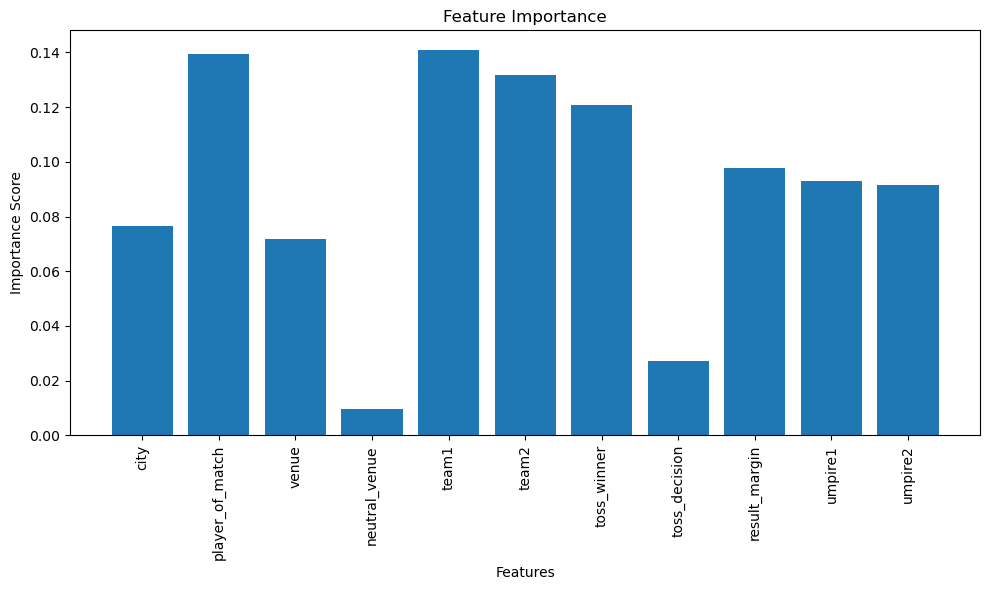

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.title('Feature Importance')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

In [59]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\armaa\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred=model.predict(X_test)

In [61]:
accuracy=accuracy_score(y_test,y_pred)

In [62]:
accuracy

0.2331288343558282

In [63]:
model=SVC()
model.fit(X_train,y_train)

SVC()

In [64]:
y_pred=model.predict(X_test)

In [65]:
accuracy=accuracy_score(y_test,y_pred)

In [66]:
accuracy

0.1656441717791411

In [67]:
# Initialize the logistic regression model
model = RandomForestClassifier(n_estimators=13)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=13)

In [68]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)

In [69]:
accuracy

0.5950920245398773

In [71]:
# Create an instance of the LGBMClassifier model
model = lgb.LGBMClassifier(
    boosting_type='gbdt',       # The type of boosting algorithm to use ('gbdt': Gradient Boosting Decision Tree)
    num_leaves=31,              # Number of leaves in one tree (default: 31)
    max_depth=-1,               # Maximum tree depth for base learners (-1 means no limit, default: -1)
    learning_rate=0.1,          # Learning rate or shrinkage rate to prevent overfitting (default: 0.1)
    n_estimators=100            # Number of boosting iterations (default: 100)
)

# Fit the model on the training data
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 367
[LightGBM] [Info] Number of data points in the train set: 649, number of used features: 11
[LightGBM] [Info] Start training from score -2.044616
[LightGBM] [Info] Start training from score -2.093406
[LightGBM] [Info] Start training from score -2.270740
[LightGBM] [Info] Start training from score -2.093406
[LightGBM] [Info] Start training from score -2.285778
[LightGBM] [Info] Start training from score -2.226937
[LightGBM] [Info] Start training from score -2.068713
[LightGBM] [Info] Start training from score -2.068713
[LightGBM] [Info] Start training from score -3.339939
[LightGBM] [Info] Start training from score -4.865995
[LightGBM] [Info] Start training from score -4.172848
[LightGBM] [Warning] No further splits with positive gai

LGBMClassifier()

In [72]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy as an example
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6687116564417178


In [73]:
data.head(1)

,city,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result_margin,umpire1,umpire2
0,0,0,0,0,4,1,4,0,1,140.0,4,3


In [78]:
def get_user_input():
#     City = input("Enter the city: ")
#     Player_of_match = input("Enter the player of the match: ")
#     Venue = input("Enter the venue: ")
#     Neutral_venue = int(input("Is it a neutral venue? (0 for No, 1 for Yes): "))
#     Team1 = input("Enter the first team: ")
#     Team2 = input("Enter the second team: ")
#     Toss_winner = input("Enter the toss winner: ")
#     Toss_decision = input("Enter the toss decision (bat or field): ")
#     Result_margin = float(input("Enter the result margin: "))
#     Umpire1 = input("Enter the name of the first umpire: ")
#     Umpire2 = input("Enter the name of the second umpire: ")

    City = "Abu Dhabi"
    Player_of_match = "RG Sharma"
    Venue = "Sheikh Zayed Stadium"
    Neutral_venue = 0
    Team1 = "Chennai Super Kings"
    Team2 = "Mumbai Indians"
    Toss_winner = "Mumbai Indians"
    Toss_decision = "field"
    Result_margin = 120.00
    Umpire1 = "Aleem Dar"
    Umpire2 = "S Ravi"


    # Map user input to numerical forms based on the mappings
    city_numeric = city_mapping.get(City, -1)
    player_of_match_numeric = player_of_match_mapping.get(Player_of_match, -1)
    venue_numeric = venue_mapping.get(Venue, -1)
    team1_numeric = team_mapping.get(Team1,-1)
    team2_numeric = team_mapping.get(Team2,-1)
    toss_winner_numeric = team_mapping.get(Toss_winner,-1)
    toss_decision_numeric = temp.get(Toss_decision,-1)
    umpire1_numeric = umpire_dict.get(Umpire1,-1)
    umpire2_numeric = umpire_dict.get(Umpire2,-1)

    user_data = pd.DataFrame({
        'city': [city_numeric],
        'player_of_match': [player_of_match_numeric],
        'venue': [venue_numeric],
        'neutral_venue': [Neutral_venue],
        'team1': [team1_numeric],
        'team2': [team2_numeric],
        'toss_winner': [toss_winner_numeric],
        'toss_decision': [toss_decision_numeric],
        'result_margin': [Result_margin],
        'umpire1': [umpire1_numeric],
        'umpire2': [umpire2_numeric]
    })

    return user_data

In [79]:
def make_predictions(user_data):
    predictions=model.predict(user_data)
    win_probability_team1=predictions[0]
    
    win_probability_percentage_team1=win_probability_team1*10
    
    return win_probability_percentage_team1

In [86]:
def main():
    print("Welcome to the IPL match winner predictor")

    #while true
    user_data=get_user_input()
    win_probability_team1=make_predictions(user_data)
    print(f"Win Probability for Team 1: {win_probability_team1:.2f}%")
    win_probability_team2=100-win_probability_team1
    print(f"Win Probability for Team 2: {win_probability_team2:.2f}%")
    print("\n\nThank you for using the IPL Match Winner Predictor!")

if __name__ == "__main__":
    main()

Welcome to the IPL match winner predictor
Win Probability for Team 1: 80.00%
Win Probability for Team 2: 20.00%


Thank you for using the IPL Match Winner Predictor!
